# Download dataset

In [1]:
# # import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("jainaru/parkinson-disease-detection")

# print("Path to dataset files:", path)

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("mozillaorg/common-voice")

# print("Path to dataset files:", path)

In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# path='/kaggle/input/parkinson-patient/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset'
# for dirname, _, filenames in os.walk(path):
#     for filename in filenames:
#         # print(filename)
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Preprocessing data

In [4]:
# import os

# for folder in os.listdir(root_dir):
#     folder_path = os.path.join(root_dir, folder)
#     print(folder_path)
#     if not os.path.isdir(folder_path):
#         continue

#     wav_count = 0

#     # Recursively walk through folder_path and its subfolders
#     for subdir, _, files in os.walk(folder_path):
#         for file in files:
#             if file.endswith('.wav'):
#                 wav_count += 1
#                 wav_path = os.path.join(subdir, file)
#                 txt_path = os.path.splitext(wav_path)[0] + '.txt'
#                 if os.path.exists(txt_path):
#                     # ... your feature extraction code ...
#                     pass

#     print(f"Number of wav files in {folder_path} (including all subfolders): {wav_count}")

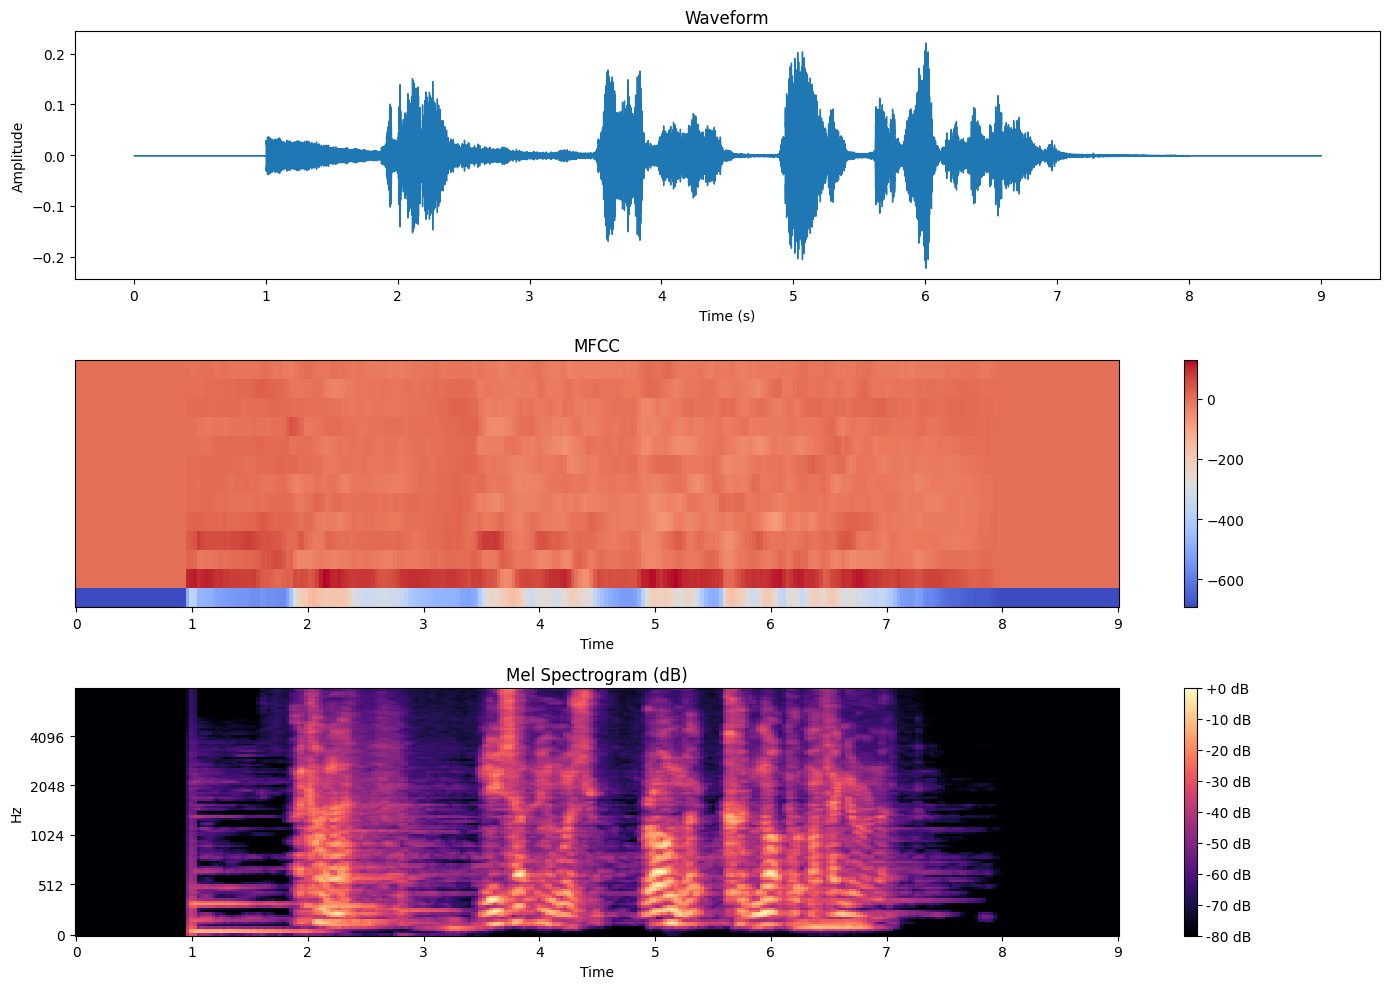

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Replace with the path to your .wav file
file_path = '/kaggle/input/dataset/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset/DL/DL1.wav'  # e.g., 'healthy_01.wav' or 'parkinson_01.wav'

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Compute features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot
plt.figure(figsize=(14, 10))

# 1. Waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 2. MFCC
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')

# 3. Mel Spectrogram
plt.subplot(3, 1, 3)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (dB)')

plt.tight_layout()
plt.show()


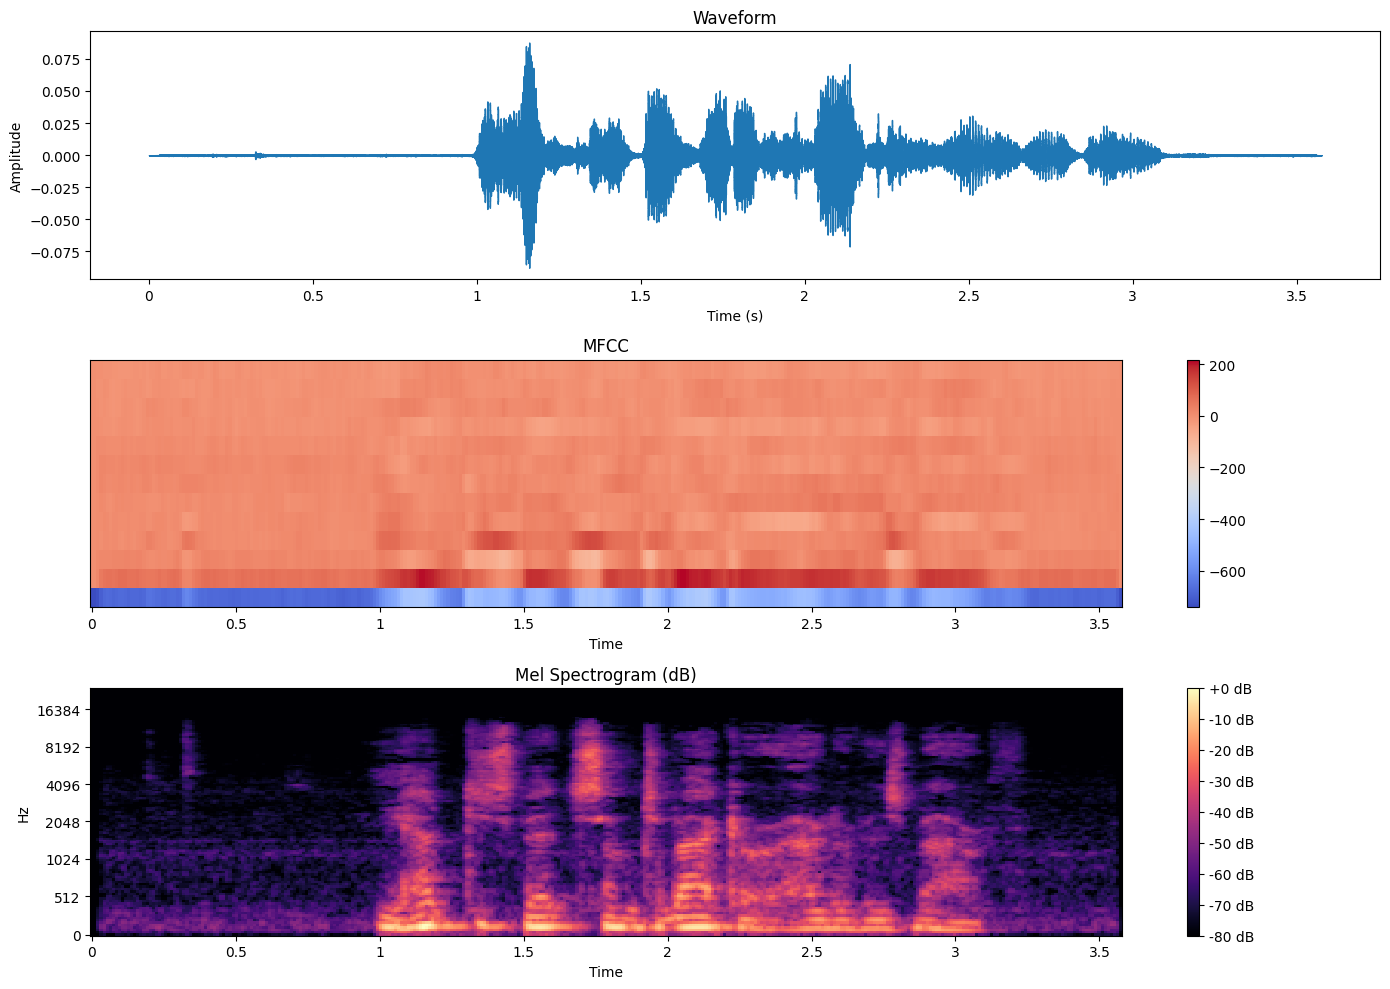

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Replace with the path to your .wav file
file_path = '/kaggle/input/common-voice/cv-other-train/cv-other-train/sample-000000.mp3'  # e.g., 'healthy_01.wav' or 'parkinson_01.wav'

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Compute features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot
plt.figure(figsize=(14, 10))

# 1. Waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 2. MFCC
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')

# 3. Mel Spectrogram
plt.subplot(3, 1, 3)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (dB)')

plt.tight_layout()
plt.show()


In [7]:
import os
import librosa
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



# Parameters
SR = 16000
N_MFCC = 50

def extract_audio_features(wav_path):
    y, sr = librosa.load(wav_path, sr=SR)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    return np.mean(mfcc, axis=1)  # shape: (N_MFCC,)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Collect data
data = []
root_dir = '/kaggle/input/dataset/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset'  # <-- Change to your data root

for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    print(folder_path)
    if not os.path.isdir(folder_path):
        continue
    # Recursively walk through folder_path and its subfolders
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.wav'):
                wav_path = os.path.join(subdir, file)
                txt_path = os.path.splitext(wav_path)[0] + '.txt'
                if os.path.exists(txt_path):
                    # Audio features
                    audio_feat = extract_audio_features(wav_path)
                    # Text features
                    with open(txt_path, 'r', encoding='utf-8') as f:
                        raw_text = f.read()
                    clean_text = preprocess_text(raw_text)
            
                    data.append((audio_feat, clean_text,0))

print(f"Total paired samples: {len(data)}")

# Split features and labels
audio_features = [item[0] for item in data]
texts = [item[1] for item in data]
y_0= [item[2] for item in data]


# Vectorize text
vectorizer = TfidfVectorizer(max_features=100)
X_text_0 = vectorizer.fit_transform(texts).toarray()  # shape: (n_samples, n_features)


# Stack audio and text features
X_audio_0 = np.stack(audio_features)  # shape: (n_samples, N_MFCC)
X_0 = np.concatenate([X_audio_0, X_text_0], axis=1)  # shape: (n_samples, N_MFCC + n_text_features)


print("Final feature shape:", X_0.shape)


/kaggle/input/dataset/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset/emma
/kaggle/input/dataset/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset/Faces
/kaggle/input/dataset/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset/Tessi
/kaggle/input/dataset/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset/DL
/kaggle/input/dataset/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset/LW
Total paired samples: 578
Final feature shape: (578, 150)


In [8]:
np.array(audio_features).shape

(578, 50)

In [9]:
print(np.max(X_0),np.min(X_0))

107.8599853515625 -774.792236328125


In [10]:
# import os

# def check_file_types(root_dir):
#     extensions = set()
#     for subdir, _, files in os.walk(root_dir):
#         for file in files:
#             ext = os.path.splitext(file)[1].lower()
#             extensions.add(ext)
#     return extensions

# root_directory = '/kaggle/input/common-voice/cv-invalid/cv-invalid'  # Change to your folder path if needed
# file_types = check_file_types(root_directory)
# print("File types found:", file_types)

In [11]:
import os
import pandas as pd
import librosa
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler


# Parameters
audio_folder = '/kaggle/input/common-voice/cv-other-train/cv-other-train'
csv_path = '/kaggle/input/common-voice/cv-other-train.csv'
N = X_0.shape[0] # Number of pairs you want
SR = 16000
N_MFCC = 50

def extract_audio_features(file_path):
    y, sr = librosa.load(file_path, sr=SR)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    return np.mean(mfcc, axis=1)  # shape: (N_MFCC,)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Load CSV
df = pd.read_csv(csv_path)
print("CSV loaded:", df.shape)

audio_features = []
texts = []
used = 0

for idx, row in df.iterrows():
    rel_path = row['filename']  # e.g., 'cv-other-train/sample-000000.mp3'
    text = row['text']
    # Build full path to audio file
    audio_path = os.path.join(audio_folder, os.path.basename(rel_path))
    if os.path.exists(audio_path):
        audio_feat = extract_audio_features(audio_path)
        text_clean = preprocess_text(text)
        audio_features.append(audio_feat)
        texts.append(text_clean)
        used += 1
        if used >= N:
            break

print(f"Total matched pairs: {len(audio_features)}")

# Vectorize text
vectorizer = TfidfVectorizer(max_features=100)
X_text_1 = vectorizer.fit_transform(texts).toarray()  # (N, n_text_features)


# Stack audio and text features
X_audio_1 = np.stack(audio_features)  # (N, N_MFCC)


X_1 = np.concatenate([X_audio_1, X_text_1], axis=1)  # (N, N_MFCC + n_text_features)
y_1=np.ones(X_1.shape[0])
print("Final input shape for model:", X_1.shape)

CSV loaded: (145135, 8)
Total matched pairs: 578
Final input shape for model: (578, 150)


In [12]:
print(np.max(X_1),np.min(X_1))

163.08554077148438 -1131.3709716796875


In [13]:
print(y_0)
print(y_1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:
print(X_audio_0.shape)
print(X_text_0.shape)
print(X_0.shape)
print(X_audio_1.shape)
print(X_text_1.shape)
print(X_1.shape)

(578, 50)
(578, 100)
(578, 150)
(578, 50)
(578, 100)
(578, 150)


In [15]:
Input = np.concatenate([X_0, X_1])
Output = np.concatenate([y_0,y_1])
print(Input.shape)
print(Output.shape)

(1156, 150)
(1156,)


In [16]:
# X,y=Input,Output # combine text and voice
X,y=Input[:,:50],Output # voice
# X,y=Input[:,50:],Output # text
print(X.shape,y.shape)

(1156, 50) (1156,)


In [17]:
min_x=np.min(X)
max_x=np.max(X)
X = (X-min_x)/(max_x-min_x)

In [18]:
print(min_x,max_x)

-1131.3709716796875 163.08554077148438


In [19]:
print(np.max(X),np.min(X))

1.0 0.0


In [20]:
from sklearn.model_selection import train_test_split

# First split into train+valid and test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Then split train+valid into train and valid
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval
)

print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (739, 50) (739,)
Valid: (185, 50) (185,)
Test: (232, 50) (232,)


In [21]:
y_test

array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0.

# CNN

In [22]:
def get_callbacks(checkpoint_filepath,patience = 5):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=patience,
                                                     min_lr=1e-20,
                                                     verbose=1)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=False,
                                                    monitor='val_accuracy',
                                                    mode='max',
                                                    save_best_only=True,
                                                    verbose=1)
    # stop=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patience*3)
    # return [reduce_lr,stop]
    return [reduce_lr, checkpoint]

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time

# Reshape input for Conv1D: (samples, steps, channels)
# Here, steps=150, channels=1
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_valid_cnn = X_valid.reshape(-1, X_valid.shape[1], 1)
X_test_cnn  = X_test.reshape(-1, X_test.shape[1], 1)
print(X_train_cnn.shape)#(739, 50, 1)
num_classes = len(set(y_train))

model1 = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn[0].shape)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model1.summary()
checkpoint_filepath = 'cnn_'+str(time.time())+'.keras'

callbacks = get_callbacks(checkpoint_filepath,5)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
metrics = ['accuracy']
model1.compile(optimizer, loss=loss, metrics=metrics)

# Train
history = model1.fit(
    X_train_cnn, y_train,
    validation_data=(X_valid_cnn, y_valid),
    epochs=400,
    callbacks = callbacks,
    batch_size=16
)

2025-06-16 04:08:34.474867: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750046914.649016      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750046914.700356      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(739, 50, 1)


I0000 00:00:1750046926.816428      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750046926.817112      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 48, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 22, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,586 (201.51 KB)

 Trainable params: 51,586 (201.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400


I0000 00:00:1750046929.334228      73 service.cc:148] XLA service 0x7af16c0035f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750046929.334617      73 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750046929.334638      73 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750046929.528402      73 cuda_dnn.cc:529] Loaded cuDNN version 90300


45/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5310 - loss: 0.6941

I0000 00:00:1750046931.169632      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5312 - loss: 0.6940
Epoch 1: val_accuracy improved from -inf to 0.50270, saving model to cnn_1750046928.0456831.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5314 - loss: 0.6940 - val_accuracy: 0.5027 - val_loss: 0.7281 - learning_rate: 0.0010
Epoch 2/400
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 0.6998
Epoch 2: val_accuracy did not improve from 0.50270
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4960 - loss: 0.6997 - val_accuracy: 0.4973 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 3/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5032 - loss: 0.6934
Epoch 3: val_accuracy did not improve from 0.50270
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5031 - loss: 0.6934 - val_accuracy: 0.4973 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 4/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4939 - loss: 0.6937
Epoch 4: val_accuracy did not improve from 0.50270
47

In [25]:
model1 = tf.keras.models.load_model('/kaggle/working/cnn_1750036765.5843837.keras')

ValueError: File not found: filepath=/kaggle/working/cnn_1750036765.5843837.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
# Predict probabilities for each class
y_pred_probs = model1.predict(X_test_cnn)

# Get the class with the highest probability for each sample
y_pred = y_pred_probs.argmax(axis=1)

print("Predicted class labels:", y_pred)
print("True class: ",y_test)
# Evaluate
test_loss, test_acc = model1.evaluate(X_test_cnn, y_test)
print("Test accuracy:", test_acc)

In [ ]:
# Use a file NOT in your training/validation/test set
audio_path = '/kaggle/input/common-voice/cv-other-train/cv-other-train/sample-000000.mp3'
X_audio_1=extract_audio_features(audio_path).reshape(1,50)
# X_audio_1 = np.stack(x_rt)
print(X_audio_1.shape)
X_audio_1 = (X_audio_1-min_x)/(max_x-min_x)
print(X_audio_1.shape)
X_test_file_cnn = X_audio_1.reshape(1, X_audio_1.shape[1], 1)
print(np.min(X_test_file_cnn),np.max(X_test_file_cnn))
pred_probs = model1.predict(X_test_file_cnn)
print(pred_probs)
pred_class = np.argmax(pred_probs, axis=1)[0]
print(pred_class)
LABELS=["parkinson","no parkinson"]
print("Predicted label:", LABELS[pred_class])

# CNN+LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time

X_train_cnn_lstm = X_train.reshape(-1, X_train.shape[1], 1)
X_valid_cnn_lstm = X_valid.reshape(-1, X_valid.shape[1], 1)
X_test_cnn_lstm  = X_test.reshape(-1, X_test.shape[1], 1)
print(X_train_cnn_lstm.shape)
num_classes = len(set(y_train))

model2 = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_lstm[0].shape)),
    # layers.Dropout(0.2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    # layers.Dropout(0.2),
    layers.Flatten(),
    layers.Reshape((1, -1)),
    layers.LSTM(16),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model2.summary()

checkpoint_filepath = 'cnn__lstm' + str(time.time()) + '.keras'

callbacks = get_callbacks(checkpoint_filepath, 5)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
metrics = ['accuracy']
model2.compile(optimizer, loss=loss, metrics=metrics)

history = model2.fit(
    X_train_cnn_lstm, y_train,
    validation_data=(X_valid_cnn_lstm, y_valid),
    epochs=400,
    callbacks=callbacks,
    batch_size=16
)

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')    
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

In [ ]:
model1 = tf.keras.models.load_model('/kaggle/working/cnn__lstm1750038629.1780088.keras')

In [ ]:
# Predict probabilities for each class
y_pred_probs = model2.predict(X_test_cnn_lstm)

# Get the class with the highest probability for each sample
y_pred = y_pred_probs.argmax(axis=1)

print("Predicted class labels:", y_pred)
print("True class: ",y_test)
# Evaluate
test_loss, test_acc = model2.evaluate(X_test_cnn_lstm, y_test)
print("Test accuracy:", test_acc)

In [ ]:
# Use a file NOT in your training/validation/test set
audio_path = '/kaggle/input/dataset/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset/DL/DL59.wav'
X_audio_1=extract_audio_features(audio_path).reshape(1,50)
# X_audio_1 = np.stack(x_rt)
print(X_audio_1.shape)
X_audio_1 = (X_audio_1-min_x)/(max_x-min_x)
print(X_audio_1.shape)
X_test_file_cnn = X_audio_1.reshape(1, X_audio_1.shape[1], 1)
print(np.min(X_test_file_cnn),np.max(X_test_file_cnn))
pred_probs = model2.predict(X_test_file_cnn)
print(pred_probs)
pred_class = np.argmax(pred_probs, axis=1)[0]
print(pred_class)
LABELS=["parkinson","no parkinson"]
print("Predicted label:", LABELS[pred_class])

# LSTM

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 50))  # (739, 50)
X_valid_scaled = scaler.transform(X_valid.reshape(-1, 50))
X_test_scaled  = scaler.transform(X_test.reshape(-1, 50))

X_train_lstm = X_train_scaled.reshape(-1, 50, 1)
X_valid_lstm = X_valid_scaled.reshape(-1, 50, 1)
X_test_lstm  = X_test_scaled.reshape(-1, 50, 1)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report

# X_train = X_train.reshape(-1, X_train.shape[1], 1)
# X_valid = X_valid.reshape(-1, X_valid.shape[1], 1)
# X_test  = X_test.reshape(-1, X_test.shape[1], 1)
print(X_train.shape)
num_classes = len(set(y_train))

model3 = models.Sequential([
    layers.LSTM(128, input_shape=X_train_lstm[0].shape, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')    
])

model3.summary()

checkpoint_filepath = 'lstm_' + str(time.time()) + '.keras'

callbacks = get_callbacks(checkpoint_filepath, 5)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
metrics = ['accuracy']

model3.compile(optimizer, loss=loss, metrics=metrics)

history = model3.fit(
    X_train_lstm, y_train,
    validation_data=(X_valid_lstm, y_valid),
    epochs=400,
    callbacks=callbacks,
    batch_size=32
)

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')    
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

In [ ]:
loss, acc = model3.evaluate(X_test_lstm, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

In [ ]:
loss, acc = model2.evaluate(X_test_cnn_lstm, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

In [ ]:
loss, acc = model1.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")